In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Midterm - Fall Semester 2016

Guidelines:
1. Use resources available to you from class and online.
1. That being said this is an individual effort, do not work with others and cite what you do use.
1. Copying is prohibited, write your own code and solutions.
1. Do not use piazza for the duration of the exam, it will be frozen!  
1. If you have a question please email the instructor and the TAs for maximal response possibilities.  We will answer questions that pertain only to clarification.  In particular this means we will not debug your code.
1. Late turn in of the midterm will result in a 10% reduction every **HOUR** that it is late.  If you feel that there is a special circumstance that warrants consideration tells us **BEFORE** the Tuesday (and more so before the exam starts).

Good luck!

## Question 1

**(a)** (10 points)  Using the second order, centered difference approximation to the first derivative find the $\Delta x$ that gives the smallest absolute error graphically for the function
$$
    f(x) = x \sin(x) + 3 \cos(x) - x
$$  
at $x = 2$.  Repeat this for the first order forward difference.  You do not have to be precise but be within an order of magnitude.

minimum error for 2nd order is: 4.35118607811e-12


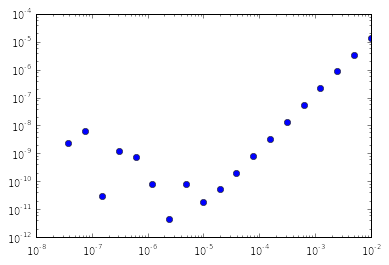

In [2]:
### INSERT CODE HERE
f = lambda x: x*numpy.sin(x) + 3*numpy.cos(x) - x
f_prime = lambda x: numpy.sin(x) + x*numpy.cos(x) - 3*numpy.sin(x) - 1

delta_x = []
error = []

for n in xrange(1,20):
    N = 2**n + 1
    x_hat = numpy.linspace(1.99, 2.01, N)
    delta_x.append(x_hat[1] - x_hat[0])
    # Compute derivative
    f_prime_hat = numpy.empty(x_hat.shape)
    # Second order, centered difference approximation
    f_prime_hat[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2 * delta_x[-1])
    # Use first-order differences for points at edge of domain
    f_prime_hat[0] = (f(x_hat[1]) - f(x_hat[0])) / delta_x[-1]  
    f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x[-1]
    error.append(numpy.abs(f_prime(x_hat[n]) - f_prime_hat[n]))

delta_x = numpy.array(delta_x)
error = numpy.array(error)

minimum = min(error)
print 'minimum error for 2nd order is:',minimum

plt.loglog(delta_x, error, 'bo')

minimum error for 2nd order is: 1.62942819237e-08


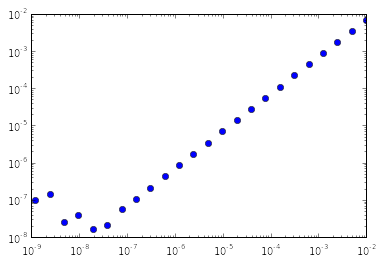

In [3]:
### INSERT CODE HERE
f = lambda x: x*numpy.sin(x) + 3*numpy.cos(x) - x
f_prime = lambda x: numpy.sin(x) + x*numpy.cos(x) - 3*numpy.sin(x) - 1

delta_x = []
error = []

for n in xrange(1,25):
    N = 2**n + 1
    x_hat = numpy.linspace(1.99, 2.01, N)
    delta_x.append(x_hat[1] - x_hat[0])
    # Compute derivative
    f_prime_hat = numpy.empty(x_hat.shape)
    # Second order, centered difference approximation
    f_prime_hat[:-1] = (f(x_hat[1:]) - f(x_hat[:-1])) / (delta_x[-1])
    # Use first-order differences for points at edge of domain
    f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x[-1]
    error.append(numpy.abs(f_prime(x_hat[n]) - f_prime_hat[n]))

delta_x = numpy.array(delta_x)
error = numpy.array(error)

minimum = min(error)
print 'minimum error for 2nd order is:',minimum

plt.loglog(delta_x, error, 'bo')

**(b)** (3 points) Why is there an optimal $\Delta x$?  Why might it be different for each approach?  What method would you choose?

# Question 2

**(a)** (5 points) Analytically compute the interpolating polynomial given by the following data

$\begin{array}{l|l|l|l|l}
x_j  & 0 & 1 & 2 & 3\\
\hline
f_j & 0 & 0 & 6 & 24
\end{array}$

### Solution
Consider $P_3(x) = p_0 + p_1 x + p_2 x^2 + p_3 x^3$ with the four data points $(x_i, y_i), ~~ i = 0,1,2,3$.  We have four equations and four datas:

$$P_3(0) = p_0 + p_1 * 0 + p_2 * 0^2 + p_3 * 0^3 = 0$$

$$P_3(1) = p_0 + p_1 * 1 + p_2 * 1^2 + p_3 * 1^3 = 0$$

$$P_3(2) = p_0 + p_1 * 2 + p_2 * 2^2 + p_3 * 2^3 = 6$$

$$P_3(3) = p_0 + p_1 * 3 + p_2 * 3^2 + p_3 * 3^3 = 24$$

After calculation, get $p_0 = 0$ $p_1 = -1$ $p_2 = 0$ $p_3 = 1$

Therefore, the interpolating polynomial is $P_3(x) = -x + x^3$

**(b)** (3 points) Show that the interpolating polynomial you found is indeed an interpolant of the data.

### Solution
Put the data into the interpolating polynomial, get:

$P_3(0) = 0 + 0 = 0$

$P_3(1) = -1 + 1 = 0$

$P_3(2) = -2 + 8 = 6$

$P_3(3) = -3 + 27 = 24$

Therefore, the interpolating polynomial I found is indeed an interpolant of the data.

**(c)** (2 points) Determine the first and second derivative of $p$ and use the result to describe the shape of the function that data may have come from.  

### Solution

Since we get $p(x) = -x + x^3$

we can derive, 

$p'(x) = -1 + 3x^2$

$p''(x) = 6x$

we can find that when $x = \frac {\sqrt{3}}{3}, p' =0$ , when $x = 0, p'' =0$

Therefore, when $x = \frac {\sqrt{3}}{3}$ and $x =- \frac {\sqrt{3}}{3}$, there exists extrema.

**(d)** (3 points) Plot the interpolating polynomial with the data points included to verify all that you have found.  Make sure to properly label your plot.  Also mark the maxima and minima you found.

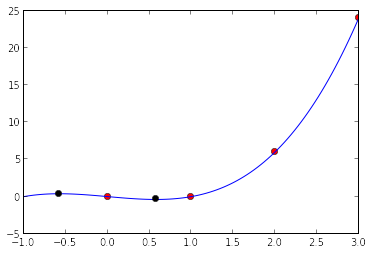

In [4]:
### INSERT CODE HERE
f = lambda x: -x + x**3
x_data = [0,1,2,3]
y_data = [0,0,6,24]
x = numpy.linspace(-1, 3.0, 100)
x_minima = numpy.sqrt(3)/3
x_maxima = -numpy.sqrt(3)/3

plt.plot(x_data, y_data, 'ro')
plt.plot(x, f(x))
plt.plot(x_minima, f(x_minima),'ko')
plt.plot(x_maxima, f(x_maxima),'ko')

## Question 3

Suppose we have a system of non-linear equations we want to solve.  Define
$$
    \vec{x} = [x_0, x_1, \ldots, x_n]
$$ 
and 
$$
    \vec{f}(\vec{x}) = [f_0(\vec{x}), f_1(\vec{x}), \ldots, f_n(\vec{x})] = \vec{0}.
$$ 
We can derive a multi-dimensional version of Newton's method by considering the multi-dimensional Taylor series around the point $\vec{x}$ of each function $f_i$,
$$
    f_i(\vec{x} + \vec{\delta}) = f_i(\vec{x}) + \sum^n_{j = 1} \frac{\partial f_i}{\partial x_j} \delta_j + \mathcal{O}(\Delta x^2).
$$
where
$$
    \vec{\delta} = [\delta_0, \delta_1, \ldots, \delta_n]
$$
and
$$
    \Delta x = \max_{i=0, n} \delta_i.
$$

As we did before for Newton's method we drop the higher order terms and set $\vec{f}(\vec{x} + \vec{\delta}) = 0$ we can rewrite the above equation as
$$
    \mathbf{J}(\vec{x}) \vec{\delta} = -\vec{f}(\vec{x})
$$
where $\mathbf{J}$ is the Jacobian matrix defined by
$$
    J_{ij} = \frac{\partial f_i}{\partial x_j}.
$$
This is now a linear system that needs to be solved for the vector $\vec{\delta}$ which can then be used in the update formula
$$
    \vec{x}_{i+1} = \vec{x}_i + \vec{\delta}.
$$

For the rest of the question please consider the system (note that $\log$ is the natural log)
$$\begin{aligned}
    \sin x + y^2 + \log z - 7 = 0& \\
    3 x + 2^y - z^3 + 1 = 0& \\
    x + y + z - 5.0= 0&
\end{aligned}$$

**(a)** (3 points) Analytically find the Jacobian of the system of equations.

### Solution
since,
$$
    J_{ij} = \frac{\partial f_i}{\partial x_j}.
$$

If we lets:


$$\begin{aligned}
    \ f_1(x,y,z) = sin x + y^2 + \log z - 7 = 0& \\
      f_2(x,y,z) = 3 x + 2^y - z^3 + 1 = 0& \\
      f_3(x,y,z) = x + y + z - 5.0= 0&
\end{aligned}$$


we can get:

$$
J = 
\begin{bmatrix} 
    \frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} & \frac{\partial f_1}{\partial z} \\
    \frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y} & \frac{\partial f_2}{\partial z} \\
    \frac{\partial f_3}{\partial x} & \frac{\partial f_3}{\partial y} & \frac{\partial f_3}{\partial z}
\end{bmatrix}
$$

Through calculation, we can get:
$$
J = 
\begin{bmatrix} 
    cos(x) & 2y & \frac{1}{z} \\
    3 & 2^yln(2) & - 3z^2 \\
    1 & 1 & 1
\end{bmatrix}
$$

**(b)** (3 points) Write a function that computes the Jacobian matrix given a vector $\vec{x} = [x, y ,z]$.

In [5]:
def jacobian(x):
    ### INSERT CODE HERE
    J = numpy.zeros((3,3))
    J[0,0] = numpy.cos(x[0])
    J[0,1] = 2. * x[1]
    J[0,2] = 1. / x[2]
    J[1,0] = 3.
    J[1,1] = 2**x[1] * numpy.log(2)
    J[1,2] = -3. * x[2]**2
    J[2,0] = 1
    J[2,1] = 1
    J[2,2] = 1
    return J

In [6]:
x = (1.0, 1.0, 1.0)
answer = jacobian(x)
true = numpy.array([[ 0.5403023058681398, 2.0, 1.0],
                    [ 3.0, 1.3862943611198906, -3.0],
                    [1.0, 1.0, 1.0]])
numpy.testing.assert_allclose(jacobian((1.0, 1.0, 1.0)), true)
print "Success!"

Success!


**(c)** (10 points) Using the function from (b) write a new function that finds the root given an initial guess $\vec{x}_0$ using Newton's method for the system.  Use the `numpy.linalg.solve` command to solve the linear system at each step.  As a stopping criteria check that the distance of $\vec{f}(\vec{x})$ from $\vec{0}$ is below the given tolerance.

In [7]:
def newton(x, tolerance=1e-10):
    ### INSERT CODE HERE
    f1 = lambda x,y,z: numpy.sin(x) + y**2 + numpy.log(z) - 7.0
    f2 = lambda x,y,z: 3.*x + 2**y - z**3 + 1.0
    f3 = lambda x,y,z: x + y + z - 5.0
    f = numpy.zeros((3,1))
    x = numpy.array(x)
    for i in xrange(100):
        f[0] = f1(x[0],x[1],x[2])
        f[1] = f2(x[0],x[1],x[2])
        f[2] = f3(x[0],x[1],x[2])
        J = numpy.linalg.solve(jacobian(x),-f)
        x[0] = J[0] + x[0]
        x[1] = J[1] + x[1]
        x[2] = J[2] + x[2]
        if (abs(f[0])<tolerance):
            break
    return x

In [8]:
numpy.testing.assert_allclose(newton(x), numpy.array([ 0.5990537566405669, 2.3959314023778169, 2.005014840981616 ]))
print "Success!"

Success!


## Question 4

Consider the Lennard-Jones potential between two molecules
$$
    V(r) = 4 \epsilon \left [ \left(\frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^6 \right ]
$$
where $\epsilon$ and $\sigma$ are constants, and $r$ is the distance between the molecules.

**(a)** (10 points) Analytically find the minimum $\sigma / r$ that minimizes the potential.  Plot the potential and the minimum you found as a check.

### Solution
Lets $\left( \frac{\sigma}{r} \right)^6 = k$, we can simplify the function to:
$$V(r) = 4 \epsilon \left ( k^2 - k \right )$$
When $k = \frac{1}{2} $, we can get the minimum of potential, $V(r) = 4 \epsilon(\frac{1}{4}-\frac{1}{2}) = -\epsilon$

Therefore, when $\sigma / r = \sqrt[6]{\frac{1}{2}} \approx 0.89$ , it will minimizes the potential.

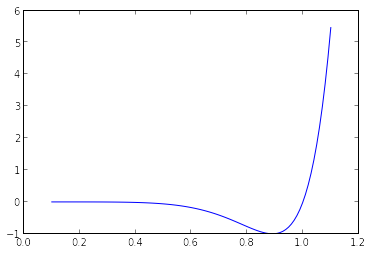

In [9]:
f = lambda x: 4*(x**12 - x**6)

x = numpy.linspace(0.1, 1.1, 100)
plt.plot(x,f(x))

**(b)** (10 points) Using Golden section search compute the minimum of the potential numerically down to a bracket size of $10^{-6}$.  Plot the convergence to the true solution you found (the location) above at each step of the algorithm.  Also plot the potential and the minimum you found.  You can choose any value of $\epsilon$ you want.

Success!
  x = 0.890898801085
  f(x) = -1.0
  number of steps = 29


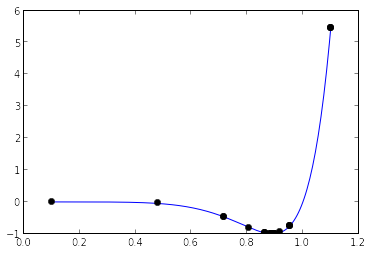

In [22]:
### INSERT CODE HERE
phi = (numpy.sqrt(5.0) - 1.0) / 2.0

TOLERANCE = 1e-6
MAX_STEPS = 100

a = 0.1
b = 1.1
c = b - phi * (b - a)
d = a + phi * (b - a)

t = numpy.linspace(0.1, 1.1, 200)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, f(t))

for n in xrange(1, MAX_STEPS + 1):
    axes.plot(a, f(a),'ko')
    axes.plot(b, f(b),'ko')
    fc = f(c)
    fd = f(d)
    
    if fc < fd:
        b = d
        d = c
        c = b - phi * (b - a)
    else:
        a = c
        c = d
        d = a + phi * (b - a)
        
    if numpy.abs(b - a) < TOLERANCE:
        success = True
        break

if success:
    print "Success!"
    print "  x = %s" % str((b + a) / 2.0)
    print "  f(x) = %s" % f((b + a) / 2.0)
    print "  number of steps = %s" % n
else:
    print "Reached maximum number of steps!"

## Question 5

The equation for an ellipse is $x^2/a^2 + y^2/b^2=1$.  The general equation for arc-length and therfore the circumference of an ellipse can be computed using
$$
    S = 2 \int^a_{-a} \sqrt{1 + (\text{d}y/\text{d}x)^2} dx.
$$

**(a)** (3 points) We can approximate the circumference by following a paper by Srinivasa Ramanujan in 1914 [1] where
$$
    S \approx \pi (a + b) \left ( 1 + \frac{3 h}{10 + \sqrt{4 - 3 h}} \right )
$$

which is $h^5$ order accurate where 
$$
    h = \frac{(a-b)^2}{(a + b)^2}.
$$
Implement a function that computes the approximation using Ramanujan's result.

1. Ramanujan, Srinivasa, (1914). "Modular Equations and Approximations to $\pi$". 
   Quart. J. Pure App. Math. 45: 350-372.

In [11]:
def S_ramanujan(a, b):
    ### INSERT CODE HERE
    h = (a-b)**2 / (a+b)**2
    S = numpy.pi * (a + b) * (1 + (3*h/(10+numpy.sqrt(4-3*h))))
    return S

In [12]:
x = numpy.random.random((2)) * 2.0 + 1.0
x.sort()
import scipy.special
S_exact = lambda a, b: 4.0 * a * scipy.special.ellipe(1.0 - b**2 / a**2)
computed = S_ramanujan(x[1], x[0])
true = S_exact(x[1], x[0])
print "Computed = %s" % computed
print "True = %s" % true
print "Error = %s" % (numpy.abs(computed - true))
numpy.testing.assert_allclose(computed, true)
print "Success!"

Computed = 13.1058075041
True = 13.1058075041
Error = 1.7763568394e-15
Success!


**(b)** (10 points) Another way to compute the circumference is to use a series due to Ivory and Bessel (you can find the original papers online which may be worth a look).  One way to write this series is

$$S = \pi (a + b) \sum^{\infty}_{n=0} \left(\begin{aligned} 0.5 \\ n~~ \end{aligned} \right)^2 h^n ~~~~~ \text{with} ~~~~~~ h = \frac{(a - b)^2}{(a+b)^2}$$

where $\left(\begin{aligned} 0.5 \\ n~~ \end{aligned} \right)$ is the binomial coefficient which can be computed via a `scipy` function.  Write a function to compute this series to a point where the difference between the partial sums is less than $\epsilon_{\text{machine}}$.

In [13]:
def S_ivory(a, b):
    ### INSERT CODE HERE
    #import scipy.special
    h = (a-b)**2 / (a+b)**2
    TOLERANCE = numpy.finfo(float).eps
    MAX_STEPS = 100
    Sum = 0.0
    for n in xrange(0,MAX_STEPS):
        Sum += scipy.special.binom(0.5,n) * scipy.special.binom(0.5,n) * h**n
        if(abs(numpy.pi*(a+b) * scipy.special.binom(0.5,n) * scipy.special.binom(0.5,n) * h**n) < TOLERANCE):
            break
    S = numpy.pi*(a+b)*Sum
    
    return S

In [14]:
x = numpy.random.random((2)) * 2.0 + 1.0
x.sort()
import scipy.special
S_exact = lambda a, b: 4.0 * a * scipy.special.ellipe(1.0 - b**2 / a**2)
computed = S_ivory(x[1], x[0])
true = S_exact(x[1], x[0])
print "Computed = %s" % computed
print "True = %s" % true
print "Error = %s" % (numpy.abs(computed - true))
numpy.testing.assert_allclose(computed, true)
print "Success!"

Computed = 10.6177906687
True = 10.6177906687
Error = 1.7763568394e-15
Success!


**(c)** (5 points) Derive an expression for the integrand using implicit differentiation.

### Solution
For the original equation: $x^2/a^2 + y^2/b^2=1$

Differentiate both side, we can get:
$$\frac{d(\frac{x^2}{a^2})}{dx} + \frac{d(\frac{y^2}{b^2})}{dx}= 0$$

$$ \frac{2x}{a^2} + \frac{(\frac{y^2}{b^2})}{dy} \frac{dy}{dx}= 0 $$

$$ \frac{2x}{a^2} + (\frac{2y}{b^2}) \frac{dy}{dx}= 0 $$

$$ \frac{dy}{dx} = \frac{-xb^2}{ya^2} $$

$$ dy = \frac{-xb^2}{ya^2}dx $$

Because $x^2/a^2 + y^2/b^2=1$, we can get: $y = \pm \sqrt{1-x^2/a^2 } \cdot b $

Therefore, 
$$ dy = \pm \frac{x \cdot b}{\sqrt{a^2-x^2 } \cdot a}dx $$

Since,
$$ S = 2 \int^a_{-a} \sqrt{1 + (\text{d}y/\text{d}x)^2} dx. $$

we can get:

**(d)** (10 points) Write a function that computes the integral to a given tolerance.  Note that this may converge very slowly so use a high enough order quadrature rule so that the computation takes less than a minute to do (this will result in an error otherwise).  Suggested largest $N$ is $1000$.  If the integration does not succeed raise a `ValueError`.  Use the `S_exact` function used in the tests above to evaluate the tolerance.

In [15]:
#def S_direct(a, b, tolerance):
#    ### INSERT CODE HERE
#    f = lambda x: numpy.sqrt((a**4 - a*a*(x**2) + b*b*(x**2))/(a**4 - a*a*(x**2))) 
#    #x = numpy.linspace(-a, a, 100)
#    num_partitions = 100
#    x_hat = numpy.linspace(-a+0.001, a-0.001, num_partitions + 1)
#    delta_x = x_hat[1] - x_hat[0]
#    Qf = numpy.zeros(x_hat.shape)
#    Qf[0] = delta_x * (1.0 / 6.0 * (f(x_hat[0]) + f(x_hat[1])) + 2.0 / 3.0 * f(x_hat[0] + delta_x / 2.0))
#    print Qf[0]
#    for i in xrange(1, num_partitions):
#        Qf[i] = Qf[i - 1] + delta_x * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x / 2.0))
#    S = 2. * Qf[num_partitions-1]
#    #print Qf
#    return S

In [16]:
def S_direct(a, b, tolerance):
    f = lambda x: numpy.sqrt(((a**4)*(1.-x**2) + (a**2)*(b**2)*(x**2))/((a**2)*(1.-x**2)))
    num_partitions = 1000
    x_hat = numpy.linspace(-1, 1, num_partitions + 1)
    delta_x = x_hat[1] - x_hat[0]
    
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi_0 = -numpy.sqrt(1.0 / 3.0)
    xi_1 =  numpy.sqrt(1.0 / 3.0)
    Qf = numpy.zeros(x_hat.shape)
    Qf[0] = (f(xi_map(x_hat[0], x_hat[1], xi_0)) + f(xi_map(x_hat[0], x_hat[1], xi_1))) * delta_x / 2.0
    for i in xrange(1, num_partitions):
        Qf[i] = Qf[i - 1] + (f(xi_map(x_hat[i], x_hat[i+1], xi_0)) + f(xi_map(x_hat[i], x_hat[i+1], xi_1))) * delta_x / 2.0
    S = 2.*Qf[num_partitions-1]
    return S

In [17]:
def S_direct(a, b, tolerance):
    f = lambda x: numpy.sqrt(((a**4)*(1.-x**2) + (a**2)*(b**2)*(x**2))/((a**2)*(1.-x**2)))
    S_exact = lambda a, b: 4.0 * a * scipy.special.ellipe(1.0 - b**2 / a**2)
    num_partitions = 1000
    x_hat = numpy.linspace(-1, 1, num_partitions + 1)
    delta_x = x_hat[1] - x_hat[0]
    
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi_0 = -numpy.sqrt(1.0 / 3.0)
    xi_1 =  numpy.sqrt(1.0 / 3.0)
    Qf = numpy.zeros(x_hat.shape)
    Qf[0] = (f(xi_map(x_hat[0], x_hat[1], xi_0)) + f(xi_map(x_hat[0], x_hat[1], xi_1))) * delta_x / 2.0
    for i in xrange(1, num_partitions):
        Qf[i] = Qf[i - 1] + (f(xi_map(x_hat[i], x_hat[i+1], xi_0)) + f(xi_map(x_hat[i], x_hat[i+1], xi_1))) * delta_x / 2.0
    S = 2.*Qf[num_partitions-1]
    return S

In [18]:
x = numpy.random.random((2)) * 2.0 + 1.0
x.sort()
import scipy.special
S_exact = lambda a, b: 4.0 * a * scipy.special.ellipe(1.0 - b**2 / a**2)
tolerance = 1e-1
computed = S_direct(x[1], x[0], tolerance)
true = S_exact(x[1], x[0])
print "Computed = %s" % computed
print "True = %s" % true
print "Error = %s" % (numpy.abs(computed - true))
numpy.testing.assert_allclose(computed, true, atol=tolerance)
print "Success!"

Computed = 15.0210154882
True = 15.1009220807
Error = 0.0799065924891
Success!


**(e)** (10 points) Note that we have been using a special function from SciPy called `ellipe`.  This function computes the elliptic integral of the second kind
$$
    E(e) = \int^{\pi/2}_0 \sqrt{1 - e^2 \sin^2 \theta} d\theta
$$
which is the arc-length over one quadrant of the ellipse.  The value $e$ is the eccentricity defined as
$$
    e = \sqrt{1 - b^2 / a^2}
$$
where here we need to define $a$ as the major-axis and $b$ the minor-axis of the ellipse (this definition is slightly different than the one in SciPy which we have been accommodating).  Elliptic integrals are a broad class of special functions that all arose from attempts at computing things related to ellipses.

Again write a function that computes the circumference of an ellipse to a provided tolerance but using this formulation of the problem.  If the integration does not succeed raise a `ValueError`.  Remember that computing the function above only gives you one quarter of the circumference and to find the total circumference you want to use
$$
    S = 4 a E(e).
$$

In [19]:
def S_elliptic_integral(a, b, tolerance):
    ### INSERT CODE HERE
    e = numpy.sqrt(1-(b**2)/(a**2))
    f = lambda x: numpy.sqrt(1.-(e**2)*numpy.sin(numpy.pi/4.*(x + 1.))**2) * numpy.pi/4.
    num_partitions = 1000
    x_hat = numpy.linspace(-1, 1, num_partitions + 1)
    delta_x = x_hat[1] - x_hat[0]
    
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi_0 = -numpy.sqrt(1.0 / 3.0)
    xi_1 =  numpy.sqrt(1.0 / 3.0)
    Qf = numpy.zeros(x_hat.shape)
    Qf[0] = (f(xi_map(x_hat[0], x_hat[1], xi_0)) + f(xi_map(x_hat[0], x_hat[1], xi_1))) * delta_x / 2.0
    for i in xrange(1, num_partitions):
        Qf[i] = Qf[i - 1] + (f(xi_map(x_hat[i], x_hat[i+1], xi_0)) + f(xi_map(x_hat[i], x_hat[i+1], xi_1))) * delta_x / 2.0
    S = 4*a*Qf[num_partitions-1]
    return S

In [20]:
x = numpy.random.random((2)) * 2.0 + 1.0
x.sort()
import scipy.special
S_exact = lambda a, b: 4.0 * a * scipy.special.ellipe(1.0 - b**2 / a**2)
tolerance = 1e-10
computed = S_elliptic_integral(x[1], x[0], tolerance)
true = S_exact(x[1], x[0])
print "Computed = %s" % computed
print "True = %s" % true
print "Error = %s" % (numpy.abs(computed - true))
numpy.testing.assert_allclose(computed, true, atol=tolerance)
print "Success!"

Computed = 10.9761299587
True = 10.9761299587
Error = 7.1054273576e-15
Success!
